# Backprop Core Example: Finetuning for Image Classification

Backprop supports zero-shot image classification right out of the box. However, that may not be the best approach in many situations:

* your specific data may be hard to classify in a zero-shot setting
* you may not be able to provide the labels
* you may need a smaller and more efficient model

If this is the case, then finetuning an image classification model is what you need.

Luckily, Backprop makes this really easy.

In [1]:
import backprop

### Getting the data

We will be using the Stanford Dogs dataset as an example.

In [2]:
import os
import tarfile

images_path = "Images"

if not os.path.isdir(images_path):
    # Download
    backprop.download("http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar", "", root=os.getcwd(), force=True)
    # Untar
    tar = tarfile.open("images.tar", "r:")
    tar.extractall()
    tar.close()

In [3]:
os.listdir(images_path)[:10]

['n02099429-curly-coated_retriever',
 'n02091467-Norwegian_elkhound',
 'n02101556-clumber',
 'n02107908-Appenzeller',
 'n02105162-malinois',
 'n02108551-Tibetan_mastiff',
 'n02108000-EntleBucher',
 'n02108422-bull_mastiff',
 'n02095314-wire-haired_fox_terrier',
 'n02091831-Saluki']

In [4]:
os.listdir(f"{images_path}/n02099429-curly-coated_retriever")[:10]

['n02099429_2934.jpg',
 'n02099429_1236.jpg',
 'n02099429_2930.jpg',
 'n02099429_3029.jpg',
 'n02099429_878.jpg',
 'n02099429_3024.jpg',
 'n02099429_2650.jpg',
 'n02099429_910.jpg',
 'n02099429_1654.jpg',
 'n02099429_3249.jpg']

As you can see, our folder has the following structure:

```
Images
├── Cool_Dog
│   ├── dog1.jpg
│   └── dog2.jpg
└── Amazing_Dog
    ├── dog1.jpg
    └── dog2.jpg
```

### Finetuning

Now, we have a root directory that contains our classes and each of our classes contains a number of images. We simply need to pass a path to a folder with this structure to Backprop.

Backprop will automatically collect the classes (dog breeds) and know which images belong to which class.


In [5]:
# Start a local image classification task with EfficientNet
ic = backprop.ImageClassification(backprop.models.EfficientNet)
# Finetune with the path to your image folder
ic.finetune(images_path)

Loaded pretrained weights for efficientnet-b0


GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Loaded pretrained weights for efficientnet-b0
Finding the optimal batch size...


Batch size 2 succeeded, trying batch size 4
Batch size 4 succeeded, trying batch size 8
Batch size 8 succeeded, trying batch size 16
Batch size 16 succeeded, trying batch size 32
Batch size 32 succeeded, trying batch size 64
Batch size 64 succeeded, trying batch size 128
Batch size 128 failed, trying batch size 64
Finished batch size finder, will continue with full run using batch size 64
Restored states from the checkpoint file at /home/kristo/Documents/backprop/examples/scale_batch_size_temp_model.ckpt
GPU available: True, used: True
TPU available: None, using: 0 TPU cores

  | Name  | Type         | Params
---------------------------------------
0 | model | EfficientNet | 4.2 M 
---------------------------------------
4.2 M     Trainable params
0         Non-trainable params
4.2 M     Total params
16.645    Total estimated model params size (MB)


Validation sanity check: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Training finished! Save your model for later with backprop.save or upload it with backprop.upload


The training took less than 10 minutes, let's see how good our model is.

In [10]:
test_image = "data/german_shepherd.jpg"

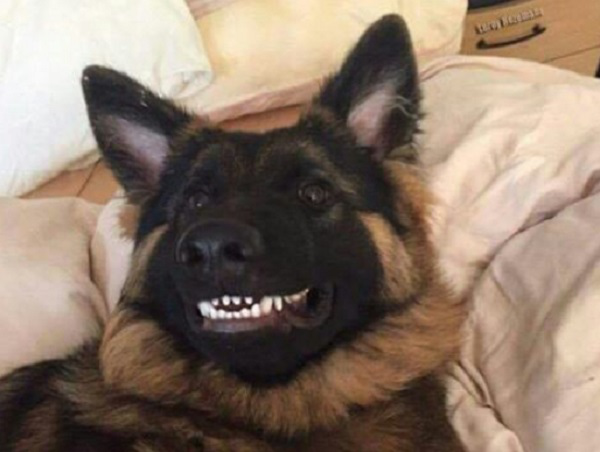

In [11]:
from PIL import Image
Image.open(test_image)

In [12]:
ic(test_image)

{'n02106662-German_shepherd': 0.9179129004478455,
 'n02091467-Norwegian_elkhound': 0.05539773404598236,
 'n02105162-malinois': 0.02427959255874157,
 'n02111129-Leonberg': 0.0010059551568701863,
 'n02116738-African_hunting_dog': 0.00030388616141863167,
 'n02112350-keeshond': 0.00018948967044707388,
 'n02105056-groenendael': 0.00014927882875781506,
 'n02112706-Brabancon_griffon': 0.00012411450734362006,
 'n02096177-cairn': 0.00010801493044709787,
 'n02105412-kelpie': 8.399112266488373e-05}

Seems like our model is over 90% confident that the dog in the picture is a German Shepherd. Great, it seems to be working!

You may notice that the labels look a bit strange. That's because our labels are our folder names. If we had given nicer names to our folders, then our labels would reflect that.

You can always rename the labels by changing the values of the `model.labels` dictionary.
This dictionary maps our output neuron indexes to labels. The values can be whatever you want, as long as you don't change the keys.